In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Preprocessing for ML Models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1x9dAEp4yshaLADZ_EBLXHSGuW3FsyYXY?usp=sharing)

In [2]:
# Set a random seed to get the same results every time
np.random.seed(3001)

In [3]:
# Generate synthetic credit card transactions (fraud/not fraud)
data_size = 1000
data = {
    'TransactionID': range(1, data_size + 1),
    'Amount': np.random.exponential(scale=200, size=data_size).astype(int),  # Amounts in USD
    'TransactionType': np.random.choice(['POS', 'ATM', 'Online', 'Transfer'], size=data_size),
    'IsFraud': np.random.choice([0, 1], size=data_size, p=[0.95, 0.05])  # 5% fraud rate
}
df = pd.DataFrame(data)
df

,TransactionID,Amount,TransactionType,IsFraud
0,1,59,ATM,0
1,2,7,Transfer,0
2,3,654,Transfer,0
3,4,119,Transfer,0
4,5,377,ATM,0
...,...,...,...,...
995,996,49,POS,0
996,997,273,Transfer,0
997,998,115,POS,0
998,999,174,ATM,1


## Rule based model

In [4]:
df.head(5)

,TransactionID,Amount,TransactionType,IsFraud
0,1,59,ATM,0
1,2,7,Transfer,0
2,3,654,Transfer,0
3,4,119,Transfer,0
4,5,377,ATM,0


In [5]:
df['RuleBasedFlag'] = df['Amount'].apply(lambda x: 1 if x > 100 else 0)

In [6]:
df.head(5)

,TransactionID,Amount,TransactionType,IsFraud,RuleBasedFlag
0,1,59,ATM,0,0
1,2,7,Transfer,0,0
2,3,654,Transfer,0,1
3,4,119,Transfer,0,1
4,5,377,ATM,0,1


## Encoding

In [7]:
encoder = LabelEncoder()

In [8]:
df['TransactionTypeEncoded'] = encoder.fit_transform(df['TransactionType'])  # Convert categories to numbers
df.head(3)

,TransactionID,Amount,TransactionType,IsFraud,RuleBasedFlag,TransactionTypeEncoded
0,1,59,ATM,0,0,0
1,2,7,Transfer,0,0,3
2,3,654,Transfer,0,1,3


In [9]:
df['TransactionTypeEncoded'].value_counts().reset_index()

,TransactionTypeEncoded,count
0,0,274
1,2,244
2,1,242
3,3,240


In [10]:
# Get encoded key
columns_encoded = ['TransactionType', 'TransactionTypeEncoded']
df.groupby(columns_encoded).count().reset_index()[columns_encoded]

,TransactionType,TransactionTypeEncoded
0,ATM,0
1,Online,1
2,POS,2
3,Transfer,3


## Normalization

In [11]:
## Normalization using Min-Max Scaling
scaler = MinMaxScaler()
df['AmountNormalized'] = scaler.fit_transform(df[['Amount']])  # Scales Amount to a range [0, 1]
df.head(3)

,TransactionID,Amount,TransactionType,IsFraud,RuleBasedFlag,TransactionTypeEncoded,AmountNormalized
0,1,59,ATM,0,0,0,0.042538
1,2,7,Transfer,0,0,3,0.005047
2,3,654,Transfer,0,1,3,0.471521


In [12]:
## Standard Scaling for use in linear models to handle outliers
standard_scaler = StandardScaler()
df['AmountScaled'] = standard_scaler.fit_transform(df[['Amount']])  # Scales data to have mean 0 and variance 1
df.head(3)

,TransactionID,Amount,TransactionType,IsFraud,RuleBasedFlag,TransactionTypeEncoded,AmountNormalized,AmountScaled
0,1,59,ATM,0,0,0,0.042538,-0.691543
1,2,7,Transfer,0,0,3,0.005047,-0.950127
2,3,654,Transfer,0,1,3,0.471521,2.267253


## Simple Sklearn Model

### No Encoding (Error Example)

In [13]:
# Splitting data into training and testing sets for model training
features = ['Amount', 'TransactionType']
X_train, X_test, y_train, y_test = train_test_split(df[features], df['IsFraud'], test_size=0.5, random_state=3001)

In [14]:
# Training a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin:.2f}")

ValueError: could not convert string to float: 'POS'

In [15]:
# Training a Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.2f}")

ValueError: could not convert string to float: 'POS'

### Scaled + Encoding

In [16]:
# Splitting data into training and testing sets for model training
features = ['AmountScaled', 'TransactionTypeEncoded']
X_train, X_test, y_train, y_test = train_test_split(df[features], df['IsFraud'], test_size=0.5, random_state=3001)

In [17]:
# Training a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin:.2f}")

Linear Regression MSE: 0.04


In [18]:
# Training a Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.2f}")

Logistic Regression Accuracy: 0.95


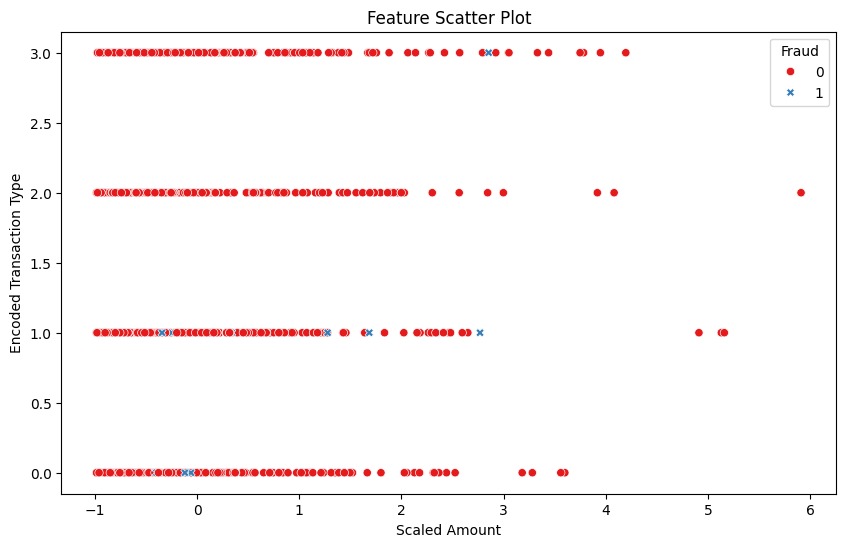

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AmountScaled'], y=df['TransactionTypeEncoded'], hue=df['IsFraud'], style=df['IsFraud'], palette='Set1')
plt.title('Feature Scatter Plot')
plt.xlabel('Scaled Amount')
plt.ylabel('Encoded Transaction Type')
plt.legend(title='Fraud')
plt.show()

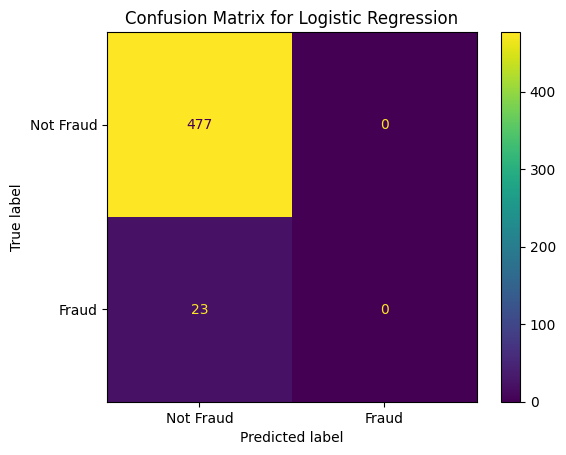

In [20]:
## Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Not Fraud', 'Fraud'])
disp_log.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()